In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.6.0


In [2]:
#!pip install tensorflow-gpu

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/MyDrive
!ls MyDrive

Mounted at /content/gdrive
'Colab Notebooks'       Helmet_detection   yolov4
'Getting started.pdf'   ssd_detection


In [ ]:
#!mkdir ssd_detection

In [6]:
%cd /content/MyDrive/ssd_detection

/content/gdrive/MyDrive/ssd_detection


In [7]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 60963, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 60963 (delta 2), reused 11 (delta 2), pack-reused 60951
Receiving objects: 100% (60963/60963), 573.92 MiB | 12.88 MiB/s, done.
Resolving deltas: 100% (42444/42444), done.
Checking out files: 100% (2625/2625), done.


In [8]:
pwd

'/content/gdrive/MyDrive/ssd_detection'

In [9]:
cd /content/MyDrive/ssd_detection/models/research

/content/gdrive/MyDrive/ssd_detection/models/research


In [10]:
!protoc object_detection/protos/*.proto --python_out=.

In [12]:
!git clone https://github.com/cocodataset/cocoapi.git

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [13]:
cd cocoapi/PythonAPI

/content/gdrive/My Drive/ssd_detection/models/research/cocoapi/PythonAPI


In [14]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/gdrive/My Drive/ssd_detection/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-LSlbJj/python3.7-3.7.11=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-LSlbJj/python3.7-3.7.11=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local

In [15]:
cp -r pycocotools /content/MyDrive/ssd_detection/models/research

In [16]:
cd ..

/content/gdrive/My Drive/ssd_detection/models/research/cocoapi


In [17]:
cd ..

/content/gdrive/My Drive/ssd_detection/models/research


In [18]:
cp object_detection/packages/tf2/setup.py .

In [20]:
!python -m pip install .

Processing /content/gdrive/MyDrive/ssd_detection/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1661033 sha256=f997e4a552fb07240c512383a6101268b031195b886cdd2be14ba212c634d118
  Stored in directory: /tmp/pip-ephem-wheel-cache-ulvpkcea/wheels/70/15/ab/629cce899e3d8a7b3e6817d41868f351b70eb7660c8c14ece0
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [21]:
!python object_detection/builders/model_builder_tf2_test.py

2021-08-31 05:35:15.592608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-31 05:35:15.878958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2021-08-31 05:35:15.904718: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Running tests under Python 3.7.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021

In [23]:
#!unzip /content/MyDrive/ssd_detection/training/train.zip -d /content/MyDrive/ssd_detection/training/images

In [25]:
#!unzip /content/MyDrive/ssd_detection/training/test.zip -d /content/MyDrive/ssd_detection/training/images

In [26]:
cd /content/MyDrive/ssd_detection/training/pretrained_models

/content/gdrive/MyDrive/ssd_detection/training/pretrained_models


In [27]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2021-08-31 05:38:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.202.128, 2607:f8b0:4001:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.202.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  41.3MB/s    in 0.5s    

2021-08-31 05:38:13 (41.3 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [28]:
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [29]:
pwd

'/content/gdrive/My Drive/ssd_detection/training/pretrained_models'

In [30]:
cd /content/MyDrive/ssd_detection/training

/content/gdrive/MyDrive/ssd_detection/training


In [31]:
# Create train data:
!python generate_tfrecord.py -x /content/MyDrive/ssd_detection/training/images/train -l /content/MyDrive/ssd_detection/training/annotations/label_map.pbtxt -o /content/MyDrive/ssd_detection/training/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/MyDrive/ssd_detection/training/images/test -l /content/MyDrive/ssd_detection/training/annotations/label_map.pbtxt -o /content/MyDrive/ssd_detection/training/annotations/test.record

Successfully created the TFRecord file: /content/MyDrive/ssd_detection/training/annotations/train.record
Successfully created the TFRecord file: /content/MyDrive/ssd_detection/training/annotations/test.record


In [32]:
pwd

'/content/gdrive/My Drive/ssd_detection/training'

In [33]:
ls

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py   test.zip
exported_models/     generate_tfrecord.py        models/             train.zip
exporter_main_v2.py  images/                     pretrained_models/


In [34]:
cp /content/MyDrive/ssd_detection/training/pretrained_models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config -d /content/MyDrive/ssd_detection/training/models/ssd_mobnet

In [35]:
!python model_main_tf2.py --model_dir=/content/MyDrive/ssd_detection/training/models/ssd_mobnet --pipeline_config_path=/content/MyDrive/ssd_detection/training/models/ssd_mobnet/pipeline.config

2021-08-31 05:44:21.221264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-31 05:44:21.237234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2021-08-31 05:44:21.238046: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-08-31 05:44:21.238659: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized wit

In [36]:
pwd

'/content/gdrive/My Drive/ssd_detection/training'

In [37]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/MyDrive/ssd_detection/training/models/ssd_mobnet/pipeline.config --trained_checkpoint_dir /content/MyDrive/ssd_detection/training/models/ssd_mobnet --output_directory /content/MyDrive/ssd_detection/training/exported_models/my_model

2021-08-31 10:25:35.405493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-31 10:25:35.411951: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2021-08-31 10:25:35.413490: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-08-31 10:25:35.425319: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized wit

# Inferencing My Trained Models

Loading model...Done! Took 20.643914699554443 seconds
Running inference for /content/MyDrive/ssd_detection/training/images/train/01868f7ebe680e2f.jpg... Done


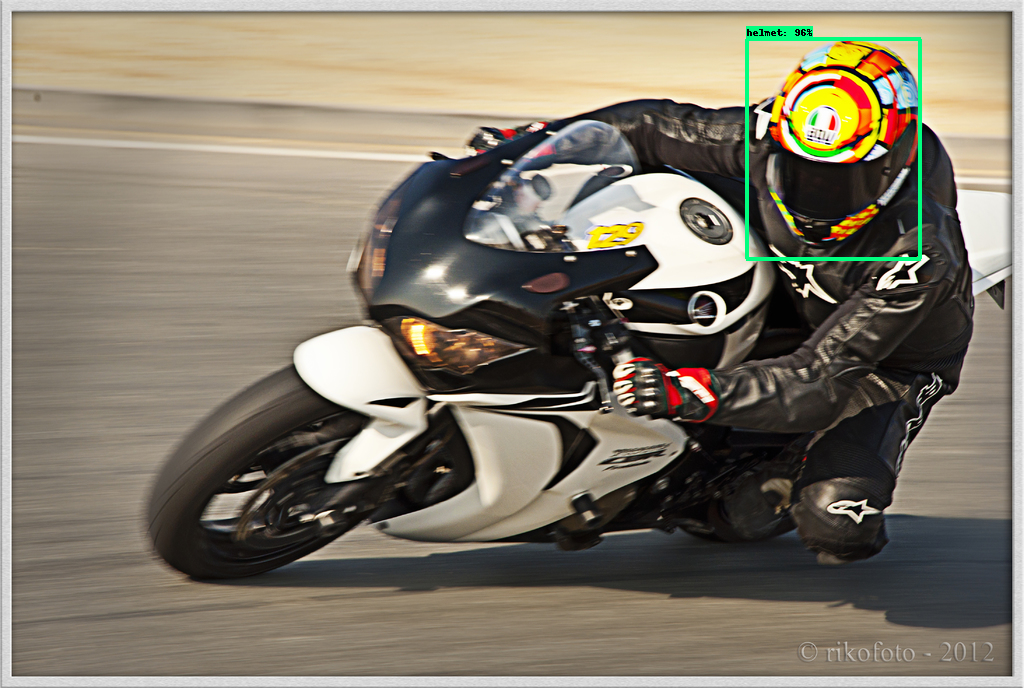

In [41]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/MyDrive/ssd_detection/training/images/train/01868f7ebe680e2f.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/MyDrive/ssd_detection/training/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/MyDrive/ssd_detection/training/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED